In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: MS
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


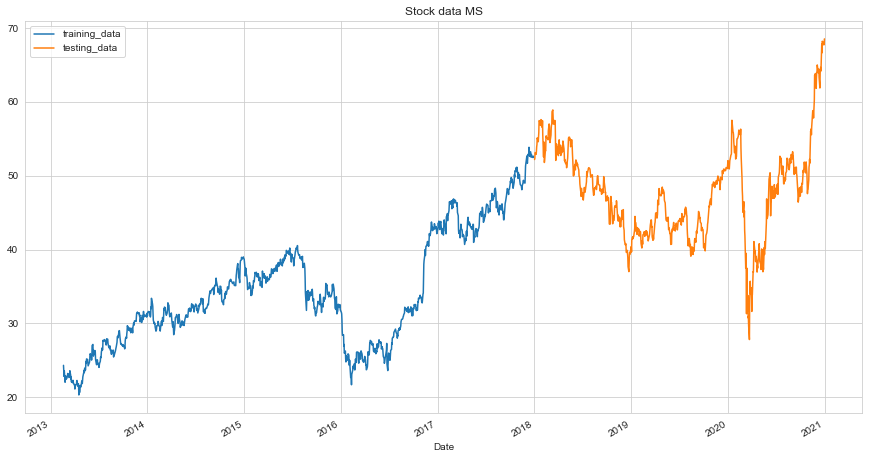

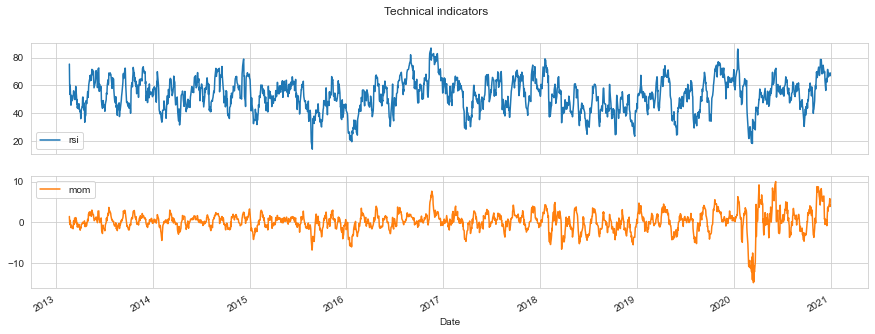

In [2]:
stock_name = 'ms'.upper()
industry = 'Financial Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1476.68, duration: 0:00:00.365082
episode: 2/2000, episode end value: 1420.01, duration: 0:00:00.360083
episode: 3/2000, episode end value: 1437.62, duration: 0:00:00.350080
episode: 4/2000, episode end value: 1432.19, duration: 0:00:00.342078
episode: 5/2000, episode end value: 1441.42, duration: 0:00:00.423099
episode: 6/2000, episode end value: 1447.62, duration: 0:00:00.412089
episode: 7/2000, episode end value: 1441.84, duration: 0:00:00.428099
episode: 8/2000, episode end value: 1452.78, duration: 0:00:00.371084
episode: 9/2000, episode end value: 1460.74, duration: 0:00:00.353076
episode: 10/2000, episode end value: 1421.63, duration: 0:00:00.304074
episode: 11/2000, episode end value: 1466.49, duration: 0:00:00.287068
episode: 12/2000, episode end value: 1402.78, duration: 0:00:00.262065
episode: 13/2000, episode end value: 1459.16, duration: 0:00:00.264059
episode: 14/2000, episode end value: 1414.92, duration: 0:00:00.306074
episode: 15/200

episode: 117/2000, episode end value: 1459.04, duration: 0:00:00.400091
episode: 118/2000, episode end value: 1414.50, duration: 0:00:00.393087
episode: 119/2000, episode end value: 1546.73, duration: 0:00:00.285063
episode: 120/2000, episode end value: 1523.59, duration: 0:00:00.494109
episode: 121/2000, episode end value: 1680.09, duration: 0:00:00.340081
episode: 122/2000, episode end value: 1525.94, duration: 0:00:00.349077
episode: 123/2000, episode end value: 1543.17, duration: 0:00:00.364082
episode: 124/2000, episode end value: 1443.87, duration: 0:00:00.312067
episode: 125/2000, episode end value: 1429.06, duration: 0:00:00.405090
episode: 126/2000, episode end value: 1453.27, duration: 0:00:00.416095
episode: 127/2000, episode end value: 1435.77, duration: 0:00:00.439102
episode: 128/2000, episode end value: 1427.69, duration: 0:00:00.375079
episode: 129/2000, episode end value: 1458.04, duration: 0:00:00.394089
episode: 130/2000, episode end value: 1454.40, duration: 0:00:00

episode: 231/2000, episode end value: 1430.50, duration: 0:00:00.461104
episode: 232/2000, episode end value: 1595.91, duration: 0:00:00.265058
episode: 233/2000, episode end value: 1472.22, duration: 0:00:00.338077
episode: 234/2000, episode end value: 1470.77, duration: 0:00:00.293072
episode: 235/2000, episode end value: 1683.92, duration: 0:00:00.444100
episode: 236/2000, episode end value: 1700.63, duration: 0:00:00.338077
episode: 237/2000, episode end value: 1413.96, duration: 0:00:00.348079
episode: 238/2000, episode end value: 1676.32, duration: 0:00:00.405093
episode: 239/2000, episode end value: 1486.01, duration: 0:00:00.282067
episode: 240/2000, episode end value: 1436.61, duration: 0:00:00.384084
episode: 241/2000, episode end value: 1444.79, duration: 0:00:00.462133
episode: 242/2000, episode end value: 1513.21, duration: 0:00:00.503113
episode: 243/2000, episode end value: 1440.81, duration: 0:00:00.508117
episode: 244/2000, episode end value: 1487.78, duration: 0:00:00

episode: 345/2000, episode end value: 1569.74, duration: 0:00:00.477109
episode: 346/2000, episode end value: 1459.92, duration: 0:00:00.482111
episode: 347/2000, episode end value: 1439.68, duration: 0:00:00.438099
episode: 348/2000, episode end value: 1461.14, duration: 0:00:00.501114
episode: 349/2000, episode end value: 1516.86, duration: 0:00:00.505113
episode: 350/2000, episode end value: 1375.85, duration: 0:00:00.316075
episode: 351/2000, episode end value: 1530.48, duration: 0:00:00.509115
episode: 352/2000, episode end value: 1527.48, duration: 0:00:00.451104
episode: 353/2000, episode end value: 1543.33, duration: 0:00:00.434094
episode: 354/2000, episode end value: 1521.31, duration: 0:00:00.453099
episode: 355/2000, episode end value: 1540.30, duration: 0:00:00.436095
episode: 356/2000, episode end value: 1491.67, duration: 0:00:00.347080
episode: 357/2000, episode end value: 1546.82, duration: 0:00:00.356079
episode: 358/2000, episode end value: 1653.57, duration: 0:00:00

episode: 459/2000, episode end value: 1580.85, duration: 0:00:00.465111
episode: 460/2000, episode end value: 1422.16, duration: 0:00:00.525113
episode: 461/2000, episode end value: 1579.64, duration: 0:00:00.462103
episode: 462/2000, episode end value: 1450.17, duration: 0:00:00.368081
episode: 463/2000, episode end value: 1454.22, duration: 0:00:00.461110
episode: 464/2000, episode end value: 1431.17, duration: 0:00:00.513119
episode: 465/2000, episode end value: 1627.69, duration: 0:00:00.449095
episode: 466/2000, episode end value: 1434.25, duration: 0:00:00.476111
episode: 467/2000, episode end value: 1429.80, duration: 0:00:00.505110
episode: 468/2000, episode end value: 1559.88, duration: 0:00:00.507118
episode: 469/2000, episode end value: 1563.89, duration: 0:00:00.405089
episode: 470/2000, episode end value: 1426.00, duration: 0:00:00.498118
episode: 471/2000, episode end value: 1420.82, duration: 0:00:00.464100
episode: 472/2000, episode end value: 1435.70, duration: 0:00:00

episode: 573/2000, episode end value: 1512.29, duration: 0:00:00.454102
episode: 574/2000, episode end value: 1440.29, duration: 0:00:00.373087
episode: 575/2000, episode end value: 1708.59, duration: 0:00:00.446104
episode: 576/2000, episode end value: 1369.20, duration: 0:00:00.378091
episode: 577/2000, episode end value: 1439.79, duration: 0:00:00.422088
episode: 578/2000, episode end value: 1500.53, duration: 0:00:00.504121
episode: 579/2000, episode end value: 1432.42, duration: 0:00:00.477101
episode: 580/2000, episode end value: 1458.76, duration: 0:00:00.468104
episode: 581/2000, episode end value: 1443.41, duration: 0:00:00.466105
episode: 582/2000, episode end value: 1419.15, duration: 0:00:00.483108
episode: 583/2000, episode end value: 1438.22, duration: 0:00:00.464106
episode: 584/2000, episode end value: 1416.46, duration: 0:00:00.532123
episode: 585/2000, episode end value: 1427.24, duration: 0:00:00.531116
episode: 586/2000, episode end value: 1688.44, duration: 0:00:00

episode: 687/2000, episode end value: 1443.44, duration: 0:00:00.368082
episode: 688/2000, episode end value: 1709.33, duration: 0:00:00.498112
episode: 689/2000, episode end value: 1556.65, duration: 0:00:00.409096
episode: 690/2000, episode end value: 1437.28, duration: 0:00:00.402093
episode: 691/2000, episode end value: 1504.20, duration: 0:00:00.397090
episode: 692/2000, episode end value: 1465.97, duration: 0:00:00.444099
episode: 693/2000, episode end value: 1488.85, duration: 0:00:00.482109
episode: 694/2000, episode end value: 1490.86, duration: 0:00:00.448103
episode: 695/2000, episode end value: 1381.08, duration: 0:00:00.366084
episode: 696/2000, episode end value: 1472.58, duration: 0:00:00.524124
episode: 697/2000, episode end value: 1456.50, duration: 0:00:00.554130
episode: 698/2000, episode end value: 1572.36, duration: 0:00:00.435100
episode: 699/2000, episode end value: 1530.93, duration: 0:00:00.386087
episode: 700/2000, episode end value: 1569.88, duration: 0:00:00

episode: 801/2000, episode end value: 1445.36, duration: 0:00:00.471106
episode: 802/2000, episode end value: 1444.79, duration: 0:00:00.429096
episode: 803/2000, episode end value: 1425.13, duration: 0:00:00.520116
episode: 804/2000, episode end value: 1447.01, duration: 0:00:00.470107
episode: 805/2000, episode end value: 1620.04, duration: 0:00:00.453105
episode: 806/2000, episode end value: 1572.05, duration: 0:00:00.373087
episode: 807/2000, episode end value: 1529.31, duration: 0:00:00.421613
episode: 808/2000, episode end value: 1440.92, duration: 0:00:00.400263
episode: 809/2000, episode end value: 1426.35, duration: 0:00:00.490113
episode: 810/2000, episode end value: 1583.40, duration: 0:00:00.557922
episode: 811/2000, episode end value: 1669.85, duration: 0:00:00.335077
episode: 812/2000, episode end value: 1447.47, duration: 0:00:00.363060
episode: 813/2000, episode end value: 1576.22, duration: 0:00:00.460102
episode: 814/2000, episode end value: 1435.62, duration: 0:00:00

episode: 915/2000, episode end value: 1586.29, duration: 0:00:00.469767
episode: 916/2000, episode end value: 1560.30, duration: 0:00:00.330072
episode: 917/2000, episode end value: 1617.81, duration: 0:00:00.435100
episode: 918/2000, episode end value: 1421.13, duration: 0:00:00.510120
episode: 919/2000, episode end value: 1446.48, duration: 0:00:00.569129
episode: 920/2000, episode end value: 1488.25, duration: 0:00:00.505113
episode: 921/2000, episode end value: 1461.71, duration: 0:00:00.474104
episode: 922/2000, episode end value: 1448.75, duration: 0:00:00.547956
episode: 923/2000, episode end value: 1441.53, duration: 0:00:00.463104
episode: 924/2000, episode end value: 1435.00, duration: 0:00:00.523087
episode: 925/2000, episode end value: 1431.28, duration: 0:00:00.448104
episode: 926/2000, episode end value: 1440.10, duration: 0:00:00.575134
episode: 927/2000, episode end value: 1438.79, duration: 0:00:00.417093
episode: 928/2000, episode end value: 1441.57, duration: 0:00:00

episode: 1029/2000, episode end value: 1457.21, duration: 0:00:00.398087
episode: 1030/2000, episode end value: 1591.04, duration: 0:00:00.400091
episode: 1031/2000, episode end value: 1508.96, duration: 0:00:00.327077
episode: 1032/2000, episode end value: 1432.60, duration: 0:00:00.440106
episode: 1033/2000, episode end value: 1451.78, duration: 0:00:00.399091
episode: 1034/2000, episode end value: 1424.81, duration: 0:00:00.409114
episode: 1035/2000, episode end value: 1433.39, duration: 0:00:00.468197
episode: 1036/2000, episode end value: 1431.19, duration: 0:00:00.514318
episode: 1037/2000, episode end value: 1447.95, duration: 0:00:00.523124
episode: 1038/2000, episode end value: 1419.59, duration: 0:00:00.547439
episode: 1039/2000, episode end value: 1584.51, duration: 0:00:00.556125
episode: 1040/2000, episode end value: 1463.38, duration: 0:00:00.403091
episode: 1041/2000, episode end value: 1442.82, duration: 0:00:00.483115
episode: 1042/2000, episode end value: 1441.18, dur

episode: 1142/2000, episode end value: 1603.01, duration: 0:00:00.402090
episode: 1143/2000, episode end value: 1635.99, duration: 0:00:00.346082
episode: 1144/2000, episode end value: 1444.78, duration: 0:00:00.424094
episode: 1145/2000, episode end value: 1428.84, duration: 0:00:00.493985
episode: 1146/2000, episode end value: 1435.47, duration: 0:00:00.527119
episode: 1147/2000, episode end value: 1584.13, duration: 0:00:00.460103
episode: 1148/2000, episode end value: 1508.89, duration: 0:00:00.355076
episode: 1149/2000, episode end value: 1650.54, duration: 0:00:00.406095
episode: 1150/2000, episode end value: 1436.61, duration: 0:00:00.395092
episode: 1151/2000, episode end value: 1494.60, duration: 0:00:00.540123
episode: 1152/2000, episode end value: 1459.05, duration: 0:00:00.406090
episode: 1153/2000, episode end value: 1435.12, duration: 0:00:00.473109
episode: 1154/2000, episode end value: 1435.61, duration: 0:00:00.504120
episode: 1155/2000, episode end value: 1441.75, dur

episode: 1255/2000, episode end value: 1450.42, duration: 0:00:00.467102
episode: 1256/2000, episode end value: 1523.96, duration: 0:00:00.468105
episode: 1257/2000, episode end value: 1439.61, duration: 0:00:00.344077
episode: 1258/2000, episode end value: 1430.81, duration: 0:00:00.531120
episode: 1259/2000, episode end value: 1430.63, duration: 0:00:00.499143
episode: 1260/2000, episode end value: 1428.45, duration: 0:00:00.537624
episode: 1261/2000, episode end value: 1579.46, duration: 0:00:00.435011
episode: 1262/2000, episode end value: 1458.92, duration: 0:00:00.532346
episode: 1263/2000, episode end value: 1428.78, duration: 0:00:00.492107
episode: 1264/2000, episode end value: 1609.70, duration: 0:00:00.454101
episode: 1265/2000, episode end value: 1452.41, duration: 0:00:00.442096
episode: 1266/2000, episode end value: 1706.49, duration: 0:00:00.435097
episode: 1267/2000, episode end value: 1660.62, duration: 0:00:00.352083
episode: 1268/2000, episode end value: 1460.90, dur

episode: 1368/2000, episode end value: 1432.08, duration: 0:00:00.430173
episode: 1369/2000, episode end value: 1524.04, duration: 0:00:00.462564
episode: 1370/2000, episode end value: 1445.06, duration: 0:00:00.461103
episode: 1371/2000, episode end value: 1454.81, duration: 0:00:00.472106
episode: 1372/2000, episode end value: 1447.62, duration: 0:00:00.506115
episode: 1373/2000, episode end value: 1420.54, duration: 0:00:00.558126
episode: 1374/2000, episode end value: 1449.13, duration: 0:00:00.437098
episode: 1375/2000, episode end value: 1444.57, duration: 0:00:00.507113
episode: 1376/2000, episode end value: 1560.42, duration: 0:00:00.514117
episode: 1377/2000, episode end value: 1498.12, duration: 0:00:00.392090
episode: 1378/2000, episode end value: 1431.04, duration: 0:00:00.527656
episode: 1379/2000, episode end value: 1436.19, duration: 0:00:00.533477
episode: 1380/2000, episode end value: 1419.81, duration: 0:00:00.521121
episode: 1381/2000, episode end value: 1435.18, dur

episode: 1481/2000, episode end value: 1479.12, duration: 0:00:00.369082
episode: 1482/2000, episode end value: 1434.59, duration: 0:00:00.476107
episode: 1483/2000, episode end value: 1550.61, duration: 0:00:00.480114
episode: 1484/2000, episode end value: 1537.26, duration: 0:00:00.413085
episode: 1485/2000, episode end value: 1499.60, duration: 0:00:00.296075
episode: 1486/2000, episode end value: 1421.28, duration: 0:00:00.433101
episode: 1487/2000, episode end value: 1677.83, duration: 0:00:00.477334
episode: 1488/2000, episode end value: 1490.61, duration: 0:00:00.409091
episode: 1489/2000, episode end value: 1538.65, duration: 0:00:00.452102
episode: 1490/2000, episode end value: 1401.43, duration: 0:00:00.409096
episode: 1491/2000, episode end value: 1678.36, duration: 0:00:00.436095
episode: 1492/2000, episode end value: 1429.92, duration: 0:00:00.405092
episode: 1493/2000, episode end value: 1425.81, duration: 0:00:00.463104
episode: 1494/2000, episode end value: 1572.65, dur

episode: 1594/2000, episode end value: 1442.89, duration: 0:00:00.472110
episode: 1595/2000, episode end value: 1666.36, duration: 0:00:00.456101
episode: 1596/2000, episode end value: 1479.67, duration: 0:00:00.354080
episode: 1597/2000, episode end value: 1436.53, duration: 0:00:00.417096
episode: 1598/2000, episode end value: 1453.07, duration: 0:00:00.500112
episode: 1599/2000, episode end value: 1553.78, duration: 0:00:00.470112
episode: 1600/2000, episode end value: 1443.19, duration: 0:00:00.459105
episode: 1601/2000, episode end value: 1452.66, duration: 0:00:00.424097
episode: 1602/2000, episode end value: 1502.14, duration: 0:00:00.459105
episode: 1603/2000, episode end value: 1547.91, duration: 0:00:00.355079
episode: 1604/2000, episode end value: 1480.55, duration: 0:00:00.390090
episode: 1605/2000, episode end value: 1468.06, duration: 0:00:00.402092
episode: 1606/2000, episode end value: 1612.83, duration: 0:00:00.504113
episode: 1607/2000, episode end value: 1373.88, dur

episode: 1707/2000, episode end value: 1511.68, duration: 0:00:00.420103
episode: 1708/2000, episode end value: 1516.00, duration: 0:00:00.410089
episode: 1709/2000, episode end value: 1439.74, duration: 0:00:00.588129
episode: 1710/2000, episode end value: 1622.43, duration: 0:00:00.483107
episode: 1711/2000, episode end value: 1435.84, duration: 0:00:00.494113
episode: 1712/2000, episode end value: 1435.37, duration: 0:00:00.451103
episode: 1713/2000, episode end value: 1684.85, duration: 0:00:00.377090
episode: 1714/2000, episode end value: 1563.63, duration: 0:00:00.390085
episode: 1715/2000, episode end value: 1407.77, duration: 0:00:00.391089
episode: 1716/2000, episode end value: 1430.59, duration: 0:00:00.439100
episode: 1717/2000, episode end value: 1520.49, duration: 0:00:00.453099
episode: 1718/2000, episode end value: 1430.35, duration: 0:00:00.429098
episode: 1719/2000, episode end value: 1593.44, duration: 0:00:00.488115
episode: 1720/2000, episode end value: 1416.14, dur

episode: 1820/2000, episode end value: 1508.94, duration: 0:00:00.340074
episode: 1821/2000, episode end value: 1559.33, duration: 0:00:00.300068
episode: 1822/2000, episode end value: 1446.28, duration: 0:00:00.329077
episode: 1823/2000, episode end value: 1475.21, duration: 0:00:00.261059
episode: 1824/2000, episode end value: 1411.40, duration: 0:00:00.383088
episode: 1825/2000, episode end value: 1440.97, duration: 0:00:00.370079
episode: 1826/2000, episode end value: 1560.02, duration: 0:00:00.333075
episode: 1827/2000, episode end value: 1686.25, duration: 0:00:00.288066
episode: 1828/2000, episode end value: 1433.63, duration: 0:00:00.316528
episode: 1829/2000, episode end value: 1439.27, duration: 0:00:00.338991
episode: 1830/2000, episode end value: 1455.30, duration: 0:00:00.330995
episode: 1831/2000, episode end value: 1512.05, duration: 0:00:00.364005
episode: 1832/2000, episode end value: 1507.33, duration: 0:00:00.272862
episode: 1833/2000, episode end value: 1623.33, dur

episode: 1933/2000, episode end value: 1511.86, duration: 0:00:00.310081
episode: 1934/2000, episode end value: 1566.80, duration: 0:00:00.267050
episode: 1935/2000, episode end value: 1434.23, duration: 0:00:00.243054
episode: 1936/2000, episode end value: 1458.18, duration: 0:00:00.280060
episode: 1937/2000, episode end value: 1437.46, duration: 0:00:00.281065
episode: 1938/2000, episode end value: 1679.17, duration: 0:00:00.253055
episode: 1939/2000, episode end value: 1421.48, duration: 0:00:00.242054
episode: 1940/2000, episode end value: 1490.86, duration: 0:00:00.289065
episode: 1941/2000, episode end value: 1476.18, duration: 0:00:00.225052
episode: 1942/2000, episode end value: 1559.82, duration: 0:00:00.262058
episode: 1943/2000, episode end value: 1439.37, duration: 0:00:00.260058
episode: 1944/2000, episode end value: 1645.23, duration: 0:00:00.265065
episode: 1945/2000, episode end value: 1402.81, duration: 0:00:00.217047
episode: 1946/2000, episode end value: 1576.34, dur

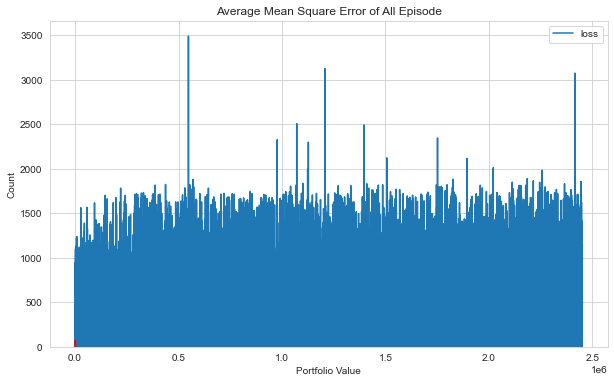

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

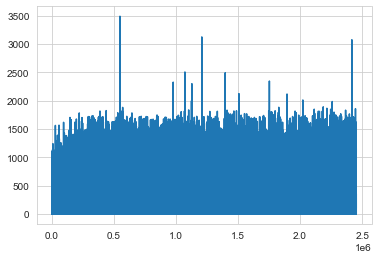

In [5]:
plt.plot(agent.model.losses)

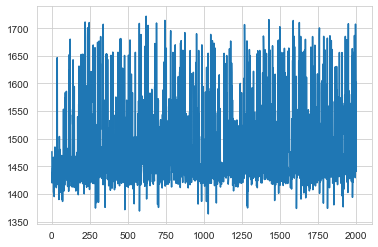

In [6]:
plt.plot(portfolio_value)

episode end value: 1209.83, duration: 0:00:00.120045
Sell: 383 times, Buy: 364 times


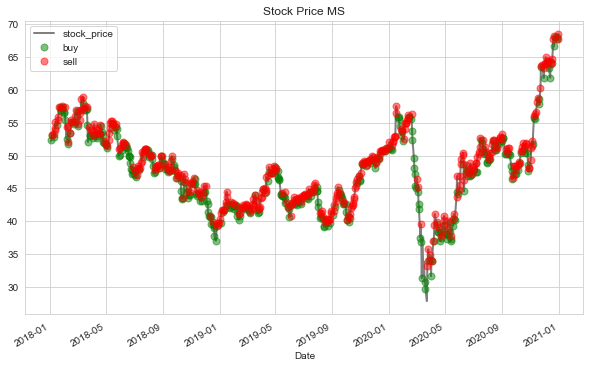

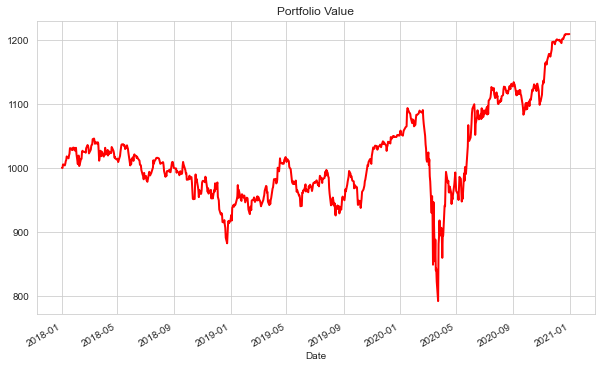

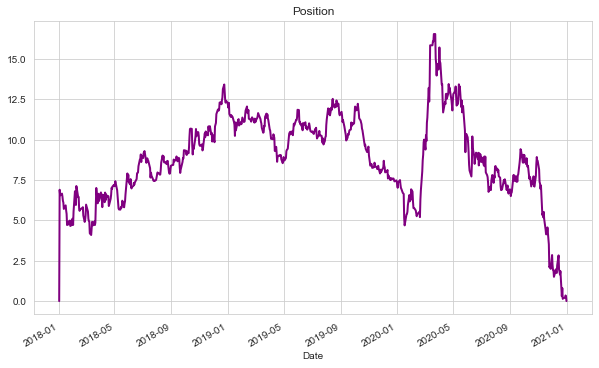

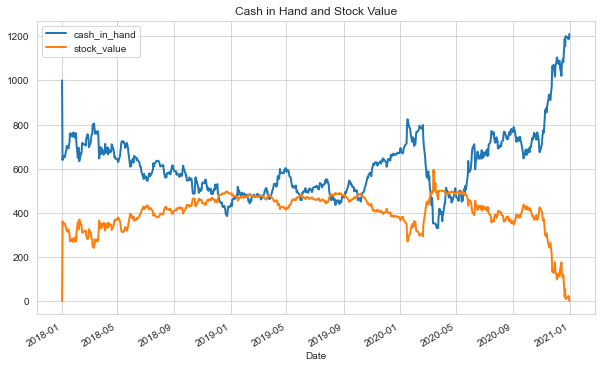

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: MS
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 6.56 %
Volatility: 0.1908
shape ratio: 0.2859
Maximun drawdown: -27.66 %
Calmar ratio: 0.2370
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 9.50 %
Volatility (benchmark): 0.3915
shape ratio: 0.2146
Maximun drawdown: -52.79 %
Calmar ratio (benchmark): 0.1800


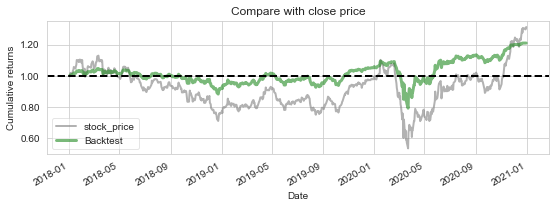

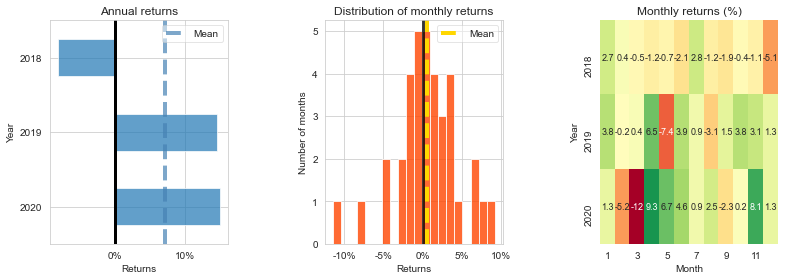

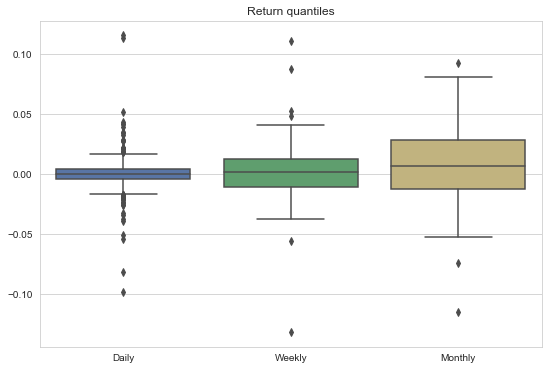

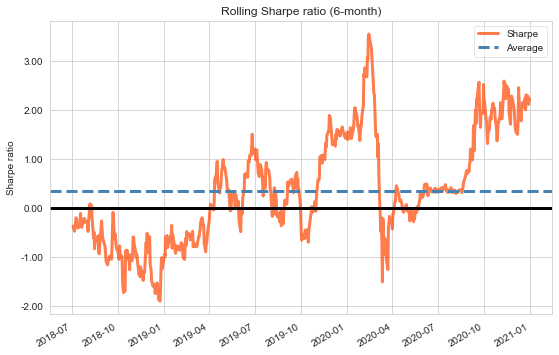

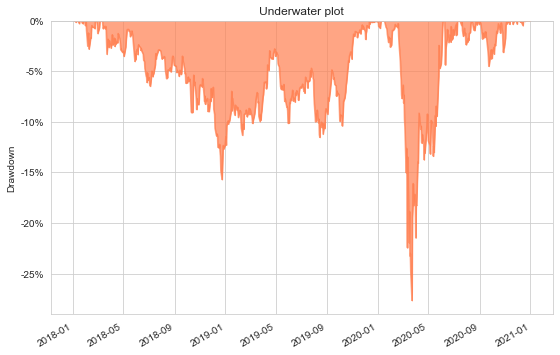

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')